In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs

In [3]:
df = pd.read_csv('aces_2020.csv')
cole = df[df.pitcher==543037]
degrom = df[df.pitcher==594798]

In [4]:
c = cole.groupby('pitch_type')
d = degrom.groupby('pitch_type')

ps = ['CH','CU','FF','SL']
avg_cats = ['release_speed', 'release_spin_rate','pfx_x',
            'pfx_z','vx0','vy0','vz0','ax','ay','az']

agg = pd.concat([c.agg('sum')[ps].sum(axis=1),
                d.agg('sum')[ps].sum(axis=1)], axis=1).rename(columns={0: "Cole", 1: "deGrom"})

cole_mean = c.agg('mean')[avg_cats]
degr_mean = d.agg('mean')[avg_cats]

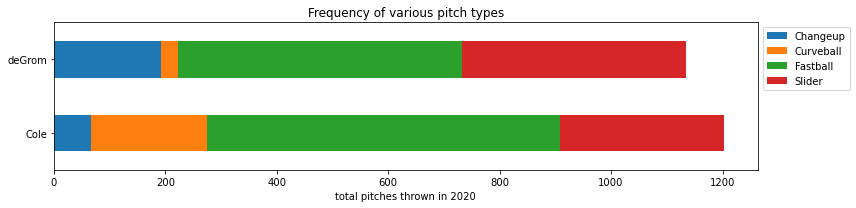

In [5]:
fig, ax = plt.subplots(figsize=(12,3))
agg.T.plot(kind='barh', stacked=True, ax=ax)
ax.legend(['Changeup','Curveball','Fastball','Slider'], bbox_to_anchor=(1, 1))
ax.set_title('Frequency of various pitch types')
ax.set_xlabel('total pitches thrown in 2020')
plt.tight_layout()
plt.savefig('stacked_bar.png')

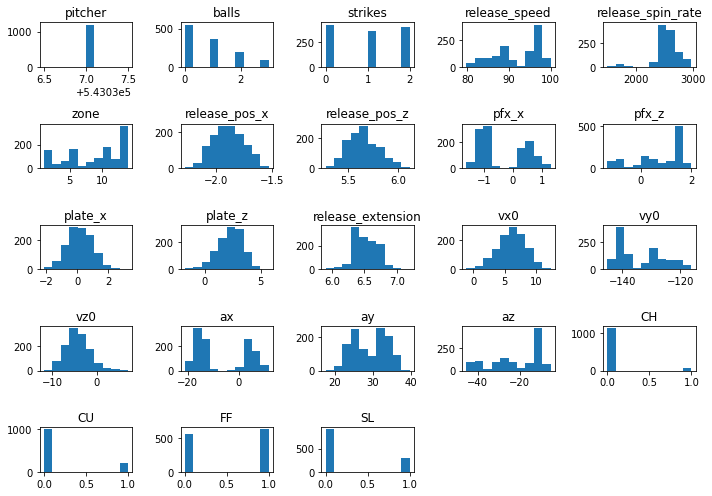

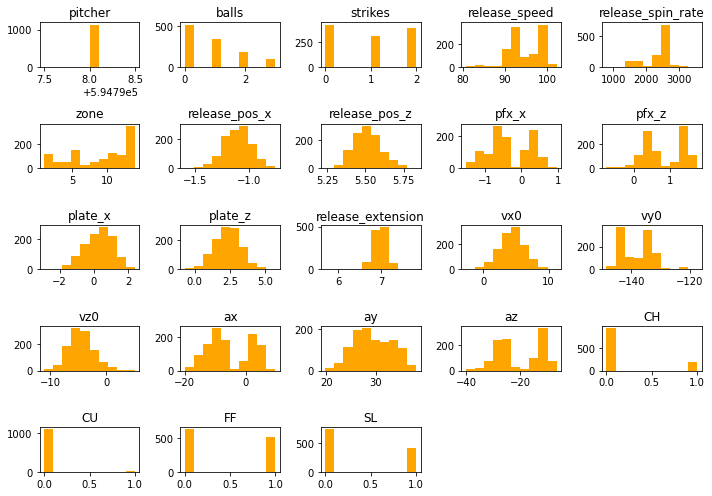

In [6]:
cole.hist(figsize=(10, 7), grid=False)
plt.tight_layout()
degrom.hist(figsize=(10, 7), grid=False, color='orange')
plt.tight_layout()

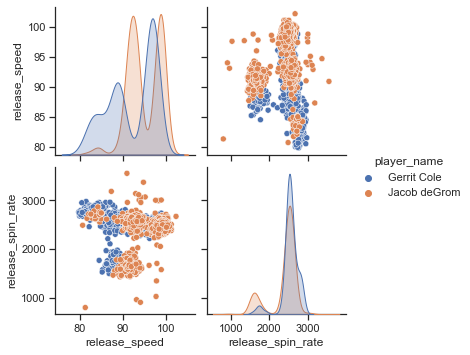

In [18]:
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
sns.pairplot(df[['player_name', 'release_speed', 'release_spin_rate']], hue='player_name')
plt.savefig('speed_spin_scatter.png')

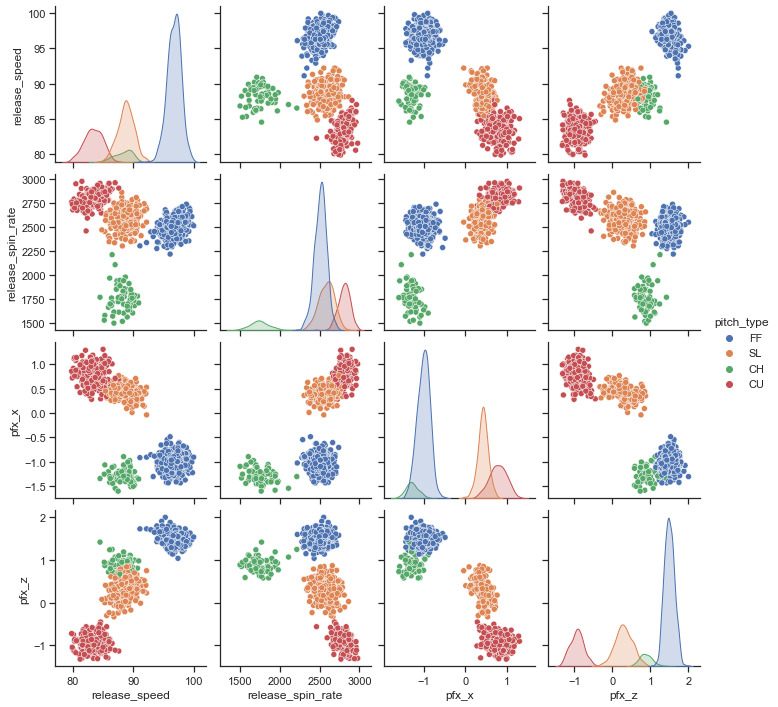

In [15]:
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
sns.pairplot(cole[['pitch_type', 'release_speed', 'release_spin_rate', 'pfx_x', 'pfx_z']], hue='pitch_type')
plt.savefig('cole_scatter.png')

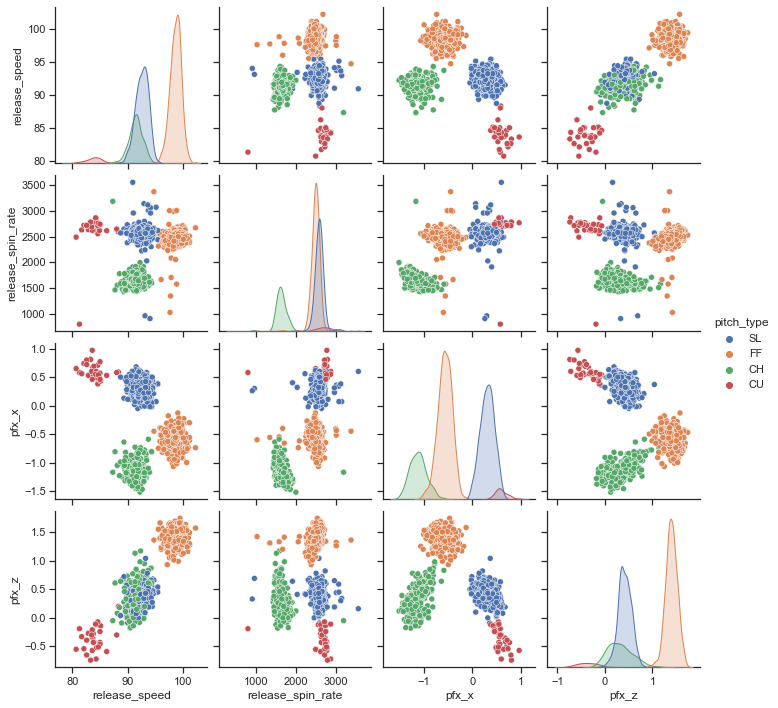

In [16]:
sns.set_theme(style='ticks')
sns.color_palette('hls', 8)
sns.pairplot(degrom[['pitch_type', 'release_speed', 'release_spin_rate', 'pfx_x', 'pfx_z']], hue='pitch_type')
plt.savefig('degrom_scatter.png')

In [ ]:
#Hypohesis test. Use mean spin rate.
fig, ax = plt.subplots(figsize=(7,5))
x=np.linspace(1300, 3200, 50)
ax.hist(cole.release_spin_rate, alpha=.6, bins=x, label='Cole')
ax.hist(degrom.release_spin_rate, alpha=.6, bins=x, label='deGrom')
ax.legend()

scs.ttest_ind(cole.release_spin_rate, degrom.release_spin_rate, equal_var=False)

In [ ]:
g=sns.FacetGrid(df, col='pitch_type',  row='pitcher')
g.map(sns.scatterplot, 'release_speed', 'release_spin_rate');

In [ ]:
h=sns.FacetGrid(df, col='pitch_type',  row='pitcher')
h.map(plt.hist, 'release_speed');